In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

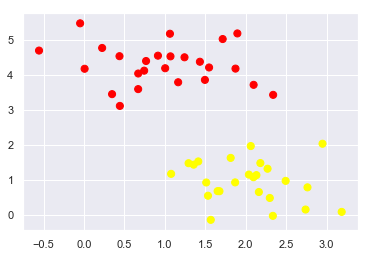

In [50]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn');

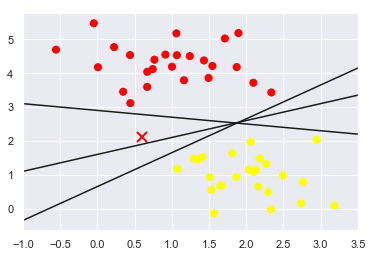

In [51]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m *xfit + b, '-k')
    
plt.xlim(-1,3.5);

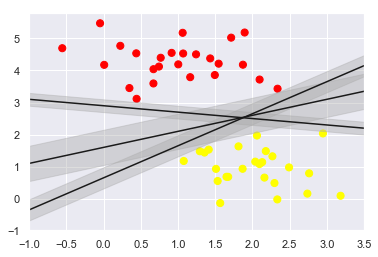

In [52]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m * xfit + b 
    plt.plot(xfit,yfit, '-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
    
plt.xlim(-1,3.5);

In [53]:
from sklearn.svm import SVC

In [54]:
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
def plot_scv_decision_function(model,ax=None, plot_support=True):
    """creating scatter of decision function 2 dimensions SVC"""
    
    if ax is None:
        ax = plt.gca()
        
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

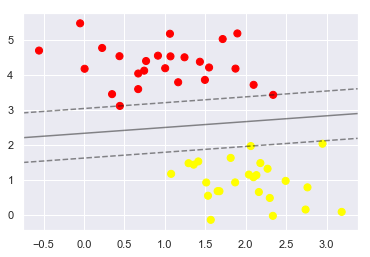

In [56]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_scv_decision_function(model);

In [57]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [58]:
def plot_svm(N=10, ax='None'):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)
    X=X[:N]
    y=y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_scv_decision_function(model,ax)

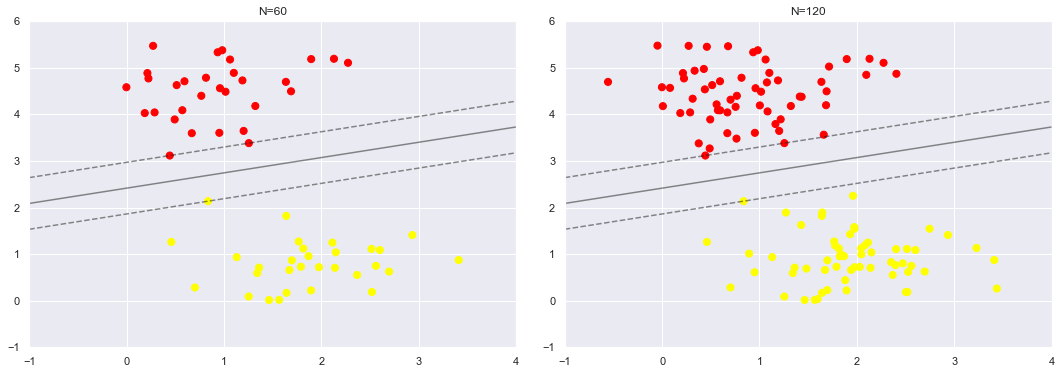

In [59]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

In [60]:
from ipywidgets import interact,fixed
interact(plot_svm,N=np.arange(10,200,10),ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13…

In [61]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles (100,factor=.1,noise=.1)

In [62]:
clf = SVC(kernel='linear').fit(X,y)

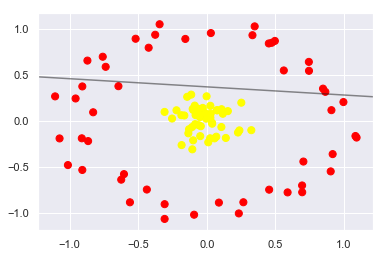

In [63]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_scv_decision_function(clf,plot_support=False);

In [64]:
r = np.exp(-(X ** 2).sum(1))

In [65]:
from mpl_toolkits import mplot3d

In [66]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [67]:
clf = SVC(kernel='rbf',C=1E6,gamma='auto')
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

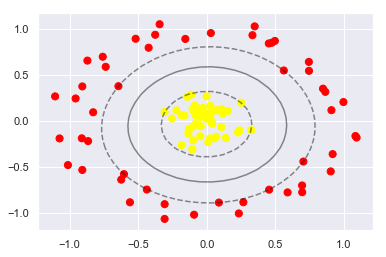

In [68]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_scv_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolor='none');

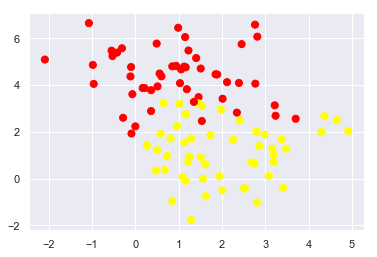

In [69]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn');

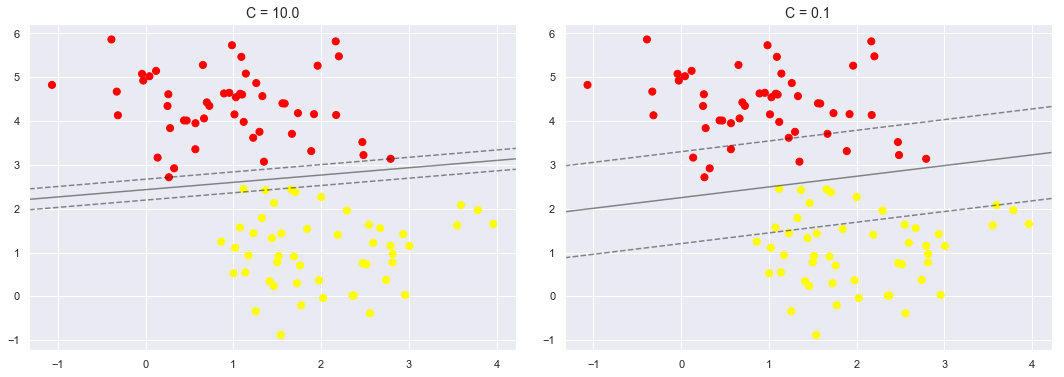

In [70]:
X,y= make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_scv_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [71]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


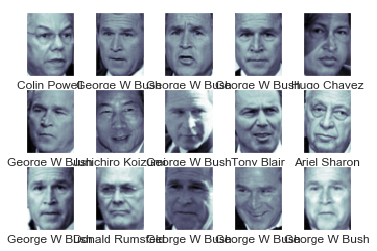

In [73]:
fig,ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [74]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [75]:
pca = PCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

In [76]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,random_state=42)

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc_C':[1,5,10,50],'svc_gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid,cv=5)

In [118]:
%time grid.fit(Xtrain, ytrain)
print(grid.best_estimator_)

ValueError: Invalid parameter svc_C for estimator Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

5
